# **<h1 style="color:red;">BRITISH AIRWAYS CUSTOMER REVIEWS (Text Analysis)</h1>**


#  <span style="color:red">DATA COLLECTION</span>


## Scrape data from the web
First Scrape review data from <u>Skytrax website</u>, focus on airline-specific reviews, collect comprehensive data for analysis using Jupyter Notebook.


## Analyse data
Once you have your dataset, you need to prepare it. The data will be very messy and contain purely text. You will need to perform data cleaning in order to prepare the data for analysis. When the data is clean, you should perform your own analysis to uncover some insights. As a starting point, you could look at <u>topic modelling</u>, <u>sentiment analysis</u> or <u>wordclouds</u> to provide some insight into the content of the reviews. It is recommended to complete this task using Python, however, you can use any tool that you wish. You can use some of the documentation websites provided in the Resources section below to analyse the data.


## Present insights
Your manager would like you to summarise your findings within a single PowerPoint slide, so that they can present the results at the next board meeting. You should create visualisations and metrics to include within this slide, as well as clear and concise explanations in order to quickly provide the key points from your analysis. Use the “PowerPoint Template” provided to complete the slide.

In [65]:
#Installing and importing the required libraries 

!pip install requests      # sending HTTP requests to websites and receiving their responses.
!pip install bs4           # used to pull data out of HTML and XML files
!pip install pandas        # data manipulation and analysis library
!pip install textblob      # used to process textual data. Povides tools for common NLP tasks.
!pip install nltk
!pip install geopy         # finds the latitude and longitude of an addresses
!pip install folium        # creates interactive map
!pip install folium seaborn
!pip install pandas nltk wordcloud
!pip install gensim


import folium
from IPython.display import IFrame

import requests
from bs4 import BeautifulSoup

import pandas as pd

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer   # provides a polarity score for the given text.
nltk.download('vader_lexicon')   #for sentiment analysis
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


import string                  # Import the string module for punctuation removal
import re                      # used for regular expressions, used for pattern matching in strings.
from textblob import TextBlob  # Import the TextBlob library for sentiment analysis



from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


import matplotlib.pyplot as plt          #  creates static, animated, and interactive visualizations
import seaborn as sns



from geopy.geocoders import Nominatim




from wordcloud import WordCloud       # visualizes the most frequently occurring words in a given text.





Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable


ERROR: Invalid requirement: '#'


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [66]:
  
             ### Scrape through the website and extracts available data ###


# Defining the base URL of the website to scrape

URL = "https://www.airlinequality.com/airline-reviews/british-airways/"

# Storing the HTML content, extracted reviews, titles, and dates of each page

page_contents = []
reviews = []
titles = []
dates = []
country = []
ratings = []
page_number = 1  # Initialize page number

while True:
    print(f"Scraping page {page_number}")

    # Creating URL for the current page
    
    url = f"{URL}/page/{page_number}/?sortby=post_date%3ADesc"

    # Sending an HTTP GET Request to the page and store the HTML content
    
    response = requests.get(url)

    # Parsing the HTML content of the page
    
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extracting data (reviews, titles, dates) from Parsed HTML Content
    
    review_elements = parsed_content.find_all("div", class_="text_content")  # Extract reviews values
    
    title_elements = parsed_content.find_all("h2", class_="text_header")  # Extract title values
    
    date_elements = parsed_content.find_all("time")  # Extract date values
    
    country_elements = parsed_content.find_all("h3")  # Extract Country value
    
    rating_elements = parsed_content.find_all("div", class_="rating-10")  # Extract rating values
    
    # Extracting Review texts from Parsed HTML Content and adding it to the review list
    
    for review_element in review_elements:
        reviews.append(review_element.text)  

    # Extracting Titles from Parsed HTML Content
    
    for title_element in title_elements:
        titles.append(title_element.text)  # Extract title text and add it to the 'titles' list

    # Extracting dates from Parsed HTML Content
    
    for date_element in date_elements:
        dates.append(date_element.text)  # Extract date text and add it to the 'dates' list
        
    # Extracting Country from parsed HTML Content
    
    for country_element in country_elements:
        country.append(country_element.span.next_sibling.text.strip(" ()"))  # Extract country text content in span element
        
    # Extracting Ratings from parsed HTML Content including "None" ratings
    
    for rating_element in rating_elements:
        try:
            ratings.append(rating_element.span.text)
        except:
            ratings.append("None")   
        
    # Appending the HTML content of this page to the list
    
    page_contents.append(parsed_content)

    # Finding and counting the number of datasets on this page
    
    num_reviews_on_page = len(review_elements)
    num_titles_on_page = len(title_elements)
    num_dates_on_page = len(date_elements)
    num_country_on_page = len(country_elements)
    num_ratings_on_page = len(rating_elements)
    
    # Printing the number of reviews, titles, and dates on this page
    
    print(f"   ---> {num_reviews_on_page} reviews on this page")
    print(f"   ---> {num_titles_on_page} titles on this page")
    print(f"   ---> {num_dates_on_page} dates on this page")
    print(f"   ---> {num_country_on_page} country on this page")
    print(f"   ---> {num_ratings_on_page} ratings on this page")
   
    # If there are no reviews on the page, exit the loop
    
    if num_reviews_on_page == 0:
        break

    # Increment the page number to move to the next page
    
    page_number += 1
    
# Initialize variables

unwanted_indices = []

# Add the first unwanted rating (index 0)

unwanted_indices.append(0)

# Loop through ratings to identify unwanted ratings

current_index = 11                         # Start from the second unwanted rating

while current_index < len(ratings):
    
    # Labeling the current index as unwanted
    
    unwanted_indices.append(current_index)

    # Moving to the next unwanted index (every 11th occurrence)
    
    current_index += 11

# Adding the last unwanted rating (index -1)

unwanted_indices.append(-1)

# Labeling the remaining ratings as wanted

wanted_indices = set(range(len(ratings))) - set(unwanted_indices)

# Correctly labeling the last rating as unwanted

wanted_indices.discard(len(ratings) - 1)
unwanted_indices.append(len(ratings) - 1)

# Printing the results

print("Unwanted Ratings Indices:", unwanted_indices)
print("Wanted Ratings Indices:", wanted_indices)
print("Total Unwanted Ratings:", len(unwanted_indices))
print("Total Wanted Ratings:", len(wanted_indices))

# using the 'wanted_indices' list to filter out the unwanted ratings

filtered_ratings = [ratings[i] for i in wanted_indices]



# Total number of data

total_reviews = len(reviews)
total_titles = len(titles)
total_dates = len(dates)
total_country = len(country)
total_ratings = len(ratings)


print(f"Total number of reviews: {total_reviews}")
print(f"Total number of titles: {total_titles}")
print(f"Total number of dates: {total_dates}")
print(f"Total number of country: {total_country}")



Scraping page 1
   ---> 10 reviews on this page
   ---> 10 titles on this page
   ---> 10 dates on this page
   ---> 10 country on this page
   ---> 11 ratings on this page
Scraping page 2
   ---> 10 reviews on this page
   ---> 10 titles on this page
   ---> 10 dates on this page
   ---> 10 country on this page
   ---> 11 ratings on this page
Scraping page 3
   ---> 10 reviews on this page
   ---> 10 titles on this page
   ---> 10 dates on this page
   ---> 10 country on this page
   ---> 11 ratings on this page
Scraping page 4
   ---> 10 reviews on this page
   ---> 10 titles on this page
   ---> 10 dates on this page
   ---> 10 country on this page
   ---> 11 ratings on this page
Scraping page 5
   ---> 10 reviews on this page
   ---> 10 titles on this page
   ---> 10 dates on this page
   ---> 10 country on this page
   ---> 11 ratings on this page
Scraping page 6
   ---> 10 reviews on this page
   ---> 10 titles on this page
   ---> 10 dates on this page
   ---> 10 country on this

In [67]:
                     #### Creating Rating Dataframe to see the wanted and unwanted (overall website) ratings ####

# Combining ratings and their corresponding indices into a dictionary

ratings_data = {'Rating': ratings, 'Index': range(len(ratings))}

# Create a DataFrame from the dictionary

ratings_df = pd.DataFrame(ratings_data)

# Mark unwanted ratings

ratings_df['Label'] = 'Wanted'

ratings_df.loc[ratings_df['Index'].isin(unwanted_indices), 'Label'] = 'Unwanted'

# Drop the 'Index' column as it is no longer needed

ratings_df.drop('Index', axis=1, inplace=True)

# Correctly label the last rating as unwanted

ratings_df.at[total_ratings - 1, 'Label'] = 'Unwanted'


# to display all the datasets without truncating the any rows 

pd.set_option('display.max_rows', None)

# Specify the file path

file_path = r"C:\Users\Hafsa\Downloads\BA Customerratings.xlsx"

# Save the DataFrame to the specified Excel file

ratings_df.to_excel(file_path, index=True)               # Keep the index column in Excel

# Display the DataFrame

print(ratings_df)


                             Rating     Label
0     \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  Unwanted
1                                 5    Wanted
2                                 1    Wanted
3                                 9    Wanted
4                                 1    Wanted
5                                 3    Wanted
6                                 8    Wanted
7                                 1    Wanted
8                                 1    Wanted
9                                 1    Wanted
10                                8    Wanted
11    \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  Unwanted
12                                7    Wanted
13                                2    Wanted
14                                3    Wanted
15                                8    Wanted
16                                1    Wanted
17                                6    Wanted
18                                8    Wanted
19                                7    Wanted
20                                

In [68]:
                 # Creating dataframe of all extracted data
    
data = {
    'SN': range(1, total_reviews + 1),
    'Reviews': reviews,
    'Dates': dates,
    'Titles': titles,
    'Countries': country,
    'Ratings': [ratings[i] for i in wanted_indices]
}

# Create the DataFrame for data before cleaning

df = pd.DataFrame(data)

# to display all the datasets without truncating the any rows 

# pd.set_option('display.max_rows', None)


# Print the head of the DataFrame and its shape

print("British Airways customer reviews:")

df.head(20)

#print(df.shape)


British Airways customer reviews:


,SN,Reviews,Dates,Titles,Countries,Ratings
0,1,✅ Trip Verified | Having not flown with BA fo...,30th November 2023,"""I was pleasantly surprised""",United Kingdom,5
1,2,✅ Trip Verified | Dear Community I feel compel...,26th November 2023,"""Buckle up, folks; this one's a rollercoaster""",Switzerland,1
2,3,✅ Trip Verified | Quick bag drop at First Win...,23rd November 2023,"""cabin crew excellent""",United Kingdom,9
3,4,✅ Trip Verified | 4 Hours before takeoff we r...,19th November 2023,"""Service level far worse then Ryanair""",Germany,1
4,5,✅ Trip Verified | I recently had a delay on B...,19th November 2023,"""do not upgrade members based on status""",United States,3
5,6,"Not Verified | Boarded on time, but it took a...",16th November 2023,"""Flight was smooth and quick""",Ireland,8
6,7,"✅ Trip Verified | 5 days before the flight, w...",16th November 2023,"""Absolutely hopeless airline""",Australia,1
7,8,Not Verified | \r\nWe traveled to Lisbon for ...,14th November 2023,"""Customer Service is non existent""",United States,1
8,9,✅ Trip Verified | Booked a flight from Buchar...,12th November 2023,"""I can’t imagine a worst airline""",Romania,1
9,10,✅ Trip Verified | Booked online months ago an...,8th November 2023,"""sufficient leg and arm room""",United Kingdom,8


In [69]:


# Display the columns and data types of the dataset


print("Columns and Data Types of the Dataset:")

print(df.dtypes)

# df.info()    # alternative to the first code, means almost similiar thing


Columns and Data Types of the Dataset:
SN            int64
Reviews      object
Dates        object
Titles       object
Countries    object
Ratings      object
dtype: object


#  <span style="color:red">DATA CLEANING</span>

## Cleaning Reviews Column 

In [70]:
                ### Deliminating the 'Reviews' column into 'Trip Status' and 'Reviews' using "|" delimiter.

# DataFrame for data before cleaning

df = pd.DataFrame(data)

# Introduce if statements to handle the scenarios you described

for index, row in df.iterrows():
    
    if row['Reviews'] is not None and '|' in row['Reviews']:
        
        # If the 'Reviews' column contains '|', deliminate everything before '|' to 'Trip Status'
        
        # and retain everything after '|' in 'Reviews'
        
        df.at[index, 'Trip Status'] = row['Reviews'].split('|')[0]
        
        df.at[index, 'Reviews'] = row['Reviews'].split('|')[1]
        
    else:
        
        # If 'Reviews' column does not contain '|', retain the original reviews in 'Reviews'
        
        # and set 'Trip Status' to "Nothing was done yet"
        
        df.at[index, 'Trip Status'] = "Nothing was done yet"
        

# Add 'Trip Verification' column to the DataFrame based on the trip status conditions

# If 'Trip Verified' or 'Verified Review' is in 'Trip Status', set 'Trip Verification' to 'Yes', else 'No'.

df['Trip Verification'] = df['Trip Status'].apply(lambda trip_status: 'Yes' if ('Trip Verified' in trip_status or 'Verified Review' in trip_status) else 'No')

# Create a copy of the DataFrame for further processing

cleaned_data = df.copy()  


# Display the updated DataFrame as cleaned British Airways customer reviews.

print("Cleaned British Airways Customer Reviews:")

cleaned_data.head(20)



Cleaned British Airways Customer Reviews:


,SN,Reviews,Dates,Titles,Countries,Ratings,Trip Status,Trip Verification
0,1,"Having not flown with BA for a few years, I ...",30th November 2023,"""I was pleasantly surprised""",United Kingdom,5,✅ Trip Verified,Yes
1,2,Dear Community I feel compelled to share the ...,26th November 2023,"""Buckle up, folks; this one's a rollercoaster""",Switzerland,1,✅ Trip Verified,Yes
2,3,Quick bag drop at First Wing but too many pa...,23rd November 2023,"""cabin crew excellent""",United Kingdom,9,✅ Trip Verified,Yes
3,4,4 Hours before takeoff we received a Mail st...,19th November 2023,"""Service level far worse then Ryanair""",Germany,1,✅ Trip Verified,Yes
4,5,I recently had a delay on British Airways fr...,19th November 2023,"""do not upgrade members based on status""",United States,3,✅ Trip Verified,Yes
5,6,"Boarded on time, but it took ages to get to ...",16th November 2023,"""Flight was smooth and quick""",Ireland,8,Not Verified,No
6,7,"5 days before the flight, we were advised by...",16th November 2023,"""Absolutely hopeless airline""",Australia,1,✅ Trip Verified,Yes
7,8,\r\nWe traveled to Lisbon for our dream vaca...,14th November 2023,"""Customer Service is non existent""",United States,1,Not Verified,No
8,9,Booked a flight from Bucharest to Manchester...,12th November 2023,"""I can’t imagine a worst airline""",Romania,1,✅ Trip Verified,Yes
9,10,Booked online months ago and the only hitch ...,8th November 2023,"""sufficient leg and arm room""",United Kingdom,8,✅ Trip Verified,Yes


In [8]:
# A corpus is a structured collection of linguistic data used in natural language processing (NLP). 

# It's essential for training models, linguistic research, and language analysis, supporting various applications and tasks.

# To clean reviews column for semantic analysis making it suitable for tasks like sentiment analysis, topic modeling, or natural language understanding. you can:

# Text Preprocessing**:
        # Tokenization: Split the text into individual words or tokens.
        # Lowercasing: Convert all words to lowercase to ensure uniformity.
        # Remove Punctuation: Eliminate special characters and punctuation marks.
        # Removing Stop Word: Filter out common and uninformative words (e.g., "the," "and", "is").
        # Lemmatization or Stemming: Reduce words to their base or root form.


# Word Embeddings: 
 # You can use pre-trained word embeddings (e.g., Word2Vec, GloVe) to convert words into numerical vectors using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) and analyze the relationships between them.


#Sentiment Analysis: 
  # libraries such as TextBlob, NLTK, or VADER helps in determining the sentiment (positive, negative, neutral) of each review.

    
# Topic Modeling: 
  # techniques like Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF) can help you discover latent topics in the reviews.

    
# Visualizations: 
   # Visualize the results using word clouds, bar charts for sentiment distribution, or scatter plots for word embeddings.

In [71]:
                                # Performing NLP text analysis on the cleaned data

# Create a list to store the preprocessed reviews (cleaned reviews data)
corpus = []

# Loop through each cleaned review, remove punctuations, convert to lowercase, remove stopwords, and join / add it to corpus


for review in cleaned_data['Reviews']:
    
    if isinstance(review, str):  # Check if 'review' is a string
        
        # Remove non-alphabet characters from text
        review = re.sub('[^a-zA-Z]', ' ', review)
        
        # Convert text to lowercase
        review = review.lower()
        
        # Split the text into a list of words
        review = review.split()
        
        # Lemmatization and remove stopwords
        lemmatizer = WordNetLemmatizer()
        review = [lemmatizer.lemmatize(word) for word in review]
        
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        review = [word for word in review if word not in stop_words]
        
        # Join the words back into a single string
        review = " ".join(review)
        
        # Add the cleaned review to the corpus
        corpus.append(review)
    else:
        corpus.append("")  # Append an empty string if 'review' is not a string

# Add the corpus to the original dataframe
df['corpus'] = corpus

# Add the corpus to the 'cleaned_data' DataFrame
#cleaned_data['corpus'] = corpus


# Check the first few rows of the updated DataFrame

#cleaned_data.head(20)

df.head(20)

# Check the first few rows of the updated DataFrame
#df.head(20)



,SN,Reviews,Dates,Titles,Countries,Ratings,Trip Status,Trip Verification,corpus
0,1,"Having not flown with BA for a few years, I ...",30th November 2023,"""I was pleasantly surprised""",United Kingdom,5,✅ Trip Verified,Yes,flown ba year read review preparation needle s...
1,2,Dear Community I feel compelled to share the ...,26th November 2023,"""Buckle up, folks; this one's a rollercoaster""",Switzerland,1,✅ Trip Verified,Yes,dear community feel compelled share utter frus...
2,3,Quick bag drop at First Wing but too many pa...,23rd November 2023,"""cabin crew excellent""",United Kingdom,9,✅ Trip Verified,Yes,quick bag drop first wing many passenger use f...
3,4,4 Hours before takeoff we received a Mail st...,19th November 2023,"""Service level far worse then Ryanair""",Germany,1,✅ Trip Verified,Yes,hour takeoff received mail stating cryptic mes...
4,5,I recently had a delay on British Airways fr...,19th November 2023,"""do not upgrade members based on status""",United States,3,✅ Trip Verified,Yes,recently delay british airway bru lhr wa due s...
5,6,"Boarded on time, but it took ages to get to ...",16th November 2023,"""Flight was smooth and quick""",Ireland,8,Not Verified,No,boarded time took age get runway due congestio...
6,7,"5 days before the flight, we were advised by...",16th November 2023,"""Absolutely hopeless airline""",Australia,1,✅ Trip Verified,Yes,day flight advised ba cancelled asked u rebook...
7,8,\r\nWe traveled to Lisbon for our dream vaca...,14th November 2023,"""Customer Service is non existent""",United States,1,Not Verified,No,traveled lisbon dream vacation cruise portugal...
8,9,Booked a flight from Bucharest to Manchester...,12th November 2023,"""I can’t imagine a worst airline""",Romania,1,✅ Trip Verified,Yes,booked flight bucharest manchester h layover h...
9,10,Booked online months ago and the only hitch ...,8th November 2023,"""sufficient leg and arm room""",United Kingdom,8,✅ Trip Verified,Yes,booked online month ago hitch wa replacement a...


In [72]:

                        # Check for null values in the cleaned dataset

# Check for null values in the cleaned dataset

missing_values = df.isnull().sum()

# Display the count of null values for each column

print("Missing values in the Cleaned British Airways Customer Reviews Datasets:")

print(missing_values)


Missing values in the Cleaned British Airways Customer Reviews Datasets:
SN                   0
Reviews              0
Dates                0
Titles               0
Countries            0
Ratings              0
Trip Status          0
Trip Verification    0
corpus               0
dtype: int64


In [73]:

                  # Check for duplicate rows based on all columns


duplicates = cleaned_data.duplicated()

# Display the rows that are duplicates

duplicate_rows = cleaned_data[duplicates]

print("Duplicate Rows:")

print(duplicate_rows)

# To count the number of duplicate rows

num_duplicates = duplicates.sum()

print(f"Number of Duplicate Rows: {num_duplicates}")



Duplicate Rows:
Empty DataFrame
Columns: [SN, Reviews, Dates, Titles, Countries, Ratings, Trip Status, Trip Verification]
Index: []
Number of Duplicate Rows: 0


In [74]:

serial_numbers_to_check = [3318, 3321]

# Create a boolean mask for the specified serial numbers
mask = cleaned_data['SN'].isin(serial_numbers_to_check)

# Display the rows corresponding to the specified serial numbers
suspected_duplicates = cleaned_data[mask]
print("Rows Corresponding to Suspected Duplicate Serial Numbers:")
print(suspected_duplicates)

# to display all the datasets without truncating the any rows 

pd.set_option('display.max_rows', None)

# Check if there are duplicates for the specified serial numbers
if suspected_duplicates.duplicated(subset=['SN']).any():
    print("There are duplicates for the specified serial numbers.")
else:
    print("There are no duplicates for the specified serial numbers.")
    
    


Rows Corresponding to Suspected Duplicate Serial Numbers:
        SN                                            Reviews  \
3317  3318  BA268 LAX-LHR seat WT+ on the A380. Check in w...   
3320  3321  BRU-Toronto-BRU 1st class. In BRU check in pas...   

                  Dates                           Titles       Countries  \
3317  6th November 2014  British Airways customer review  United Kingdom   
3320  5th November 2014  British Airways customer review         Belgium   

     Ratings           Trip Status Trip Verification  
3317       8  Nothing was done yet                No  
3320       3  Nothing was done yet                No  
There are no duplicates for the specified serial numbers.


In [75]:
# Assuming 'cleaned_data' is your DataFrame
serial_numbers_to_check = [3318, 3321]

# Create a boolean mask for the specified serial numbers
mask = cleaned_data['SN'].isin(serial_numbers_to_check)

# Display the rows corresponding to the specified serial numbers
suspected_duplicates = cleaned_data[mask]

# Check if the reviews for serial numbers 3318 and 3321 start with ')'
for index, row in suspected_duplicates.iterrows():
    if row['Reviews'].startswith(')'):
        print(f"Serial Number {row['SN']} review starts with ')'")
    else:
        print(f"Serial Number {row['SN']} review does not start with ')'")


Serial Number 3318 review does not start with ')'
Serial Number 3321 review does not start with ')'


In [76]:

# Print the column names of the cleaned data

print(df.columns)


Index(['SN', 'Reviews', 'Dates', 'Titles', 'Countries', 'Ratings',
       'Trip Status', 'Trip Verification', 'corpus'],
      dtype='object')


#   <span style="color:red">Data Analysis</span>



### 1. Sentiment Analysis:

Analyze the sentiment of customer reviews to understand the overall positivity or negativity.
Use sentiment analysis tools like VADER, TextBlob, or other natural language processing (NLP) techniques.


### 2. Descriptive Statistics:

Calculate mean, median, mode, range, and standard deviation for numerical data (e.g., Ratings) to understand the central tendency and variability.



### 4. Topic Modeling:

Apply topic modeling techniques (e.g., Latent Dirichlet Allocation - LDA) to identify latent topics within the reviews. This can help uncover underlying themes and subjects discussed by customers.




.



### 8. Text Summarization:

Automatically generate summaries for reviews to get a quick overview of customer sentiments. This can be particularly useful when dealing with a large volume of reviews.


### 9. Customer Segmentation:

Segment customers based on different criteria (e.g., demographics, trip status, verification status) and analyze how reviews vary across these segments.


### 10. Correlation Analysis:

Investigate potential correlations between different variables (e.g., Ratings and Trip Status) to understand relationships within the data.


### 11. Word Clouds:

Create word clouds to visually represent the most prominent words in the reviews. Larger words indicate higher frequency.
Comparison with Competitors:

#### If possible, compare customer reviews with those of competitors to identify areas where your website performs well or needs improvement.

## 1. Sentiment Analysis
To gauge the customer satisfaction and determine whether they're positive negative or neutral reviews 

In [80]:
# imports the NLTK library and specifically the SentimentIntensityAnalyzer class from the VADER module.

# VADER is a pre-trained sentiment analysis tool.


import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon which is a list of words with associated sentiment scores used for sentiment analysis

nltk.download('vader_lexicon')

# Creating a SentimentIntensityAnalyzer to analyze the sentiment of the text data.

sia = SentimentIntensityAnalyzer()

# Creating a new column named 'sentiment' to store the calculated compound sentiment score for each text in corpus column.

df['sentiment'] = df['corpus'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on the compound score

# Sentiment labels ('positive', 'negative', or 'neutral') are assigned based on the compound sentiment score.

df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


# Display the total count of each sentiment label

sentiment_counts = df['sentiment_label'].value_counts()

print("\nTotal Count of Each Sentiment Label:")

print(sentiment_counts)


# Display the DataFrame with sentiment information

df.head(50)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hafsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Total Count of Each Sentiment Label:
positive    2529
negative    1160
neutral       15
Name: sentiment_label, dtype: int64


,SN,Reviews,Dates,Titles,Countries,Ratings,Trip Status,Trip Verification,corpus,sentiment,sentiment_label,polarity,polarity_label,vader_mapped_label
0,1,"Having not flown with BA for a few years, I ...",30th November 2023,"""I was pleasantly surprised""",United Kingdom,5,✅ Trip Verified,Yes,flown ba year read review preparation needle s...,-0.4770,negative,-0.065556,negative,negative
1,2,Dear Community I feel compelled to share the ...,26th November 2023,"""Buckle up, folks; this one's a rollercoaster""",Switzerland,1,✅ Trip Verified,Yes,dear community feel compelled share utter frus...,-0.9552,negative,-0.005252,negative,negative
2,3,Quick bag drop at First Wing but too many pa...,23rd November 2023,"""cabin crew excellent""",United Kingdom,9,✅ Trip Verified,Yes,quick bag drop first wing many passenger use f...,0.9806,positive,0.420000,positive,positive
3,4,4 Hours before takeoff we received a Mail st...,19th November 2023,"""Service level far worse then Ryanair""",Germany,1,✅ Trip Verified,Yes,hour takeoff received mail stating cryptic mes...,-0.8704,negative,-0.048214,negative,negative
4,5,I recently had a delay on British Airways fr...,19th November 2023,"""do not upgrade members based on status""",United States,3,✅ Trip Verified,Yes,recently delay british airway bru lhr wa due s...,-0.0972,negative,0.006944,positive,negative
5,6,"Boarded on time, but it took ages to get to ...",16th November 2023,"""Flight was smooth and quick""",Ireland,8,Not Verified,No,boarded time took age get runway due congestio...,0.4404,positive,0.140833,positive,positive
6,7,"5 days before the flight, we were advised by...",16th November 2023,"""Absolutely hopeless airline""",Australia,1,✅ Trip Verified,Yes,day flight advised ba cancelled asked u rebook...,-0.2247,negative,0.113889,positive,negative
7,8,\r\nWe traveled to Lisbon for our dream vaca...,14th November 2023,"""Customer Service is non existent""",United States,1,Not Verified,No,traveled lisbon dream vacation cruise portugal...,0.8074,positive,0.135417,positive,positive
8,9,Booked a flight from Bucharest to Manchester...,12th November 2023,"""I can’t imagine a worst airline""",Romania,1,✅ Trip Verified,Yes,booked flight bucharest manchester h layover h...,-0.9517,negative,-0.234896,negative,negative
9,10,Booked online months ago and the only hitch ...,8th November 2023,"""sufficient leg and arm room""",United Kingdom,8,✅ Trip Verified,Yes,booked online month ago hitch wa replacement a...,-0.2350,negative,0.100595,positive,negative


In [42]:
# The choice between TextBlob with the Naive Bayes algorithm and VADER from NLTK depends on your specific use case, the characteristics of your text data, and the goals of your sentiment analysis.



# Pros of TextBlob (Naive Bayes):

## Provides a more nuanced sentiment analysis, if data contains complex language or context.
## The Naive Bayes algorithm is trained on a dataset of movie reviews, which is be beneficial if text data is similar in nature.



## Cons of TextBlob (Naive Bayes):

## May require training on a domain-specific dataset for better performance.
## The Naive Bayes model may not generalize well to certain types of text, especially if the language or context is significantly different from the training data.


## Pros of VADER (NLTK):

# # Designed for social media text and short sentences, making it suitable for quick sentiment analysis tasks.
## No need for training on a domain-specific dataset, as it relies on a predefined lexicon and rule-based approach.


## Cons of VADER (NLTK):

## May not perform as well on longer and more complex text.
## The predefined lexicon might not capture domain-specific sentiments well.


## Recommendations:

## If the text data is relatively straightforward, short, and doesn't involve complex language or nuanced sentiments, VADER can be a good choice due to its simplicity and ease of use.

# If the text data is more complex, contains nuanced sentiments, or requires a higher level of accuracy, you might consider using TextBlob with the Naive Bayes algorithm.

# In many cases, it's a good idea to experiment with both approaches and evaluate their performance on your specific dataset. Choose the one that aligns better with the characteristics of your data and the goals of your sentiment analysis task.

In [78]:
                       ### Method 2 ###

# Import necessary libraries
from textblob import TextBlob
import pandas as pd

# Assuming 'corpus' is the correct column name for text data
# Set a column 'polarity' with an initial value set to 0 to store the sentiment polarity scores
df['polarity'] = 0

# Loop through each row in 'corpus' column, convert into TextBlob object, and calculate sentiment polarity scores
for i in range(len(df['corpus'])):
    sent = TextBlob(df['corpus'][i])
    polarity = sent.sentiment.polarity
    
    # Assign sentiment polarity scores to the 'polarity' column of the original DataFrame ('df')
    df['polarity'][i] = polarity

# Create a new column 'polarity_label' based on the sentiment polarity scores
df['polarity_label'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


# Display the total count of each polarity label
polarity_counts = df['polarity_label'].value_counts()
print("\nTotal Count of Each Polarity Label:")
print(polarity_counts)

# Display the updated DataFrame
df.head(20)


C:\Users\Hafsa\AppData\Local\Temp\ipykernel_6912\297900130.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polarity'][i] = polarity



Total Count of Each Polarity Label:
positive    2605
negative    1073
neutral       26
Name: polarity_label, dtype: int64


,SN,Reviews,Dates,Titles,Countries,Ratings,Trip Status,Trip Verification,corpus,sentiment,sentiment_label,polarity,polarity_label
0,1,"Having not flown with BA for a few years, I ...",30th November 2023,"""I was pleasantly surprised""",United Kingdom,5,✅ Trip Verified,Yes,flown ba year read review preparation needle s...,-0.4770,negative,-0.065556,negative
1,2,Dear Community I feel compelled to share the ...,26th November 2023,"""Buckle up, folks; this one's a rollercoaster""",Switzerland,1,✅ Trip Verified,Yes,dear community feel compelled share utter frus...,-0.9552,negative,-0.005252,negative
2,3,Quick bag drop at First Wing but too many pa...,23rd November 2023,"""cabin crew excellent""",United Kingdom,9,✅ Trip Verified,Yes,quick bag drop first wing many passenger use f...,0.9806,positive,0.420000,positive
3,4,4 Hours before takeoff we received a Mail st...,19th November 2023,"""Service level far worse then Ryanair""",Germany,1,✅ Trip Verified,Yes,hour takeoff received mail stating cryptic mes...,-0.8704,negative,-0.048214,negative
4,5,I recently had a delay on British Airways fr...,19th November 2023,"""do not upgrade members based on status""",United States,3,✅ Trip Verified,Yes,recently delay british airway bru lhr wa due s...,-0.0972,negative,0.006944,positive
5,6,"Boarded on time, but it took ages to get to ...",16th November 2023,"""Flight was smooth and quick""",Ireland,8,Not Verified,No,boarded time took age get runway due congestio...,0.4404,positive,0.140833,positive
6,7,"5 days before the flight, we were advised by...",16th November 2023,"""Absolutely hopeless airline""",Australia,1,✅ Trip Verified,Yes,day flight advised ba cancelled asked u rebook...,-0.2247,negative,0.113889,positive
7,8,\r\nWe traveled to Lisbon for our dream vaca...,14th November 2023,"""Customer Service is non existent""",United States,1,Not Verified,No,traveled lisbon dream vacation cruise portugal...,0.8074,positive,0.135417,positive
8,9,Booked a flight from Bucharest to Manchester...,12th November 2023,"""I can’t imagine a worst airline""",Romania,1,✅ Trip Verified,Yes,booked flight bucharest manchester h layover h...,-0.9517,negative,-0.234896,negative
9,10,Booked online months ago and the only hitch ...,8th November 2023,"""sufficient leg and arm room""",United Kingdom,8,✅ Trip Verified,Yes,booked online month ago hitch wa replacement a...,-0.2350,negative,0.100595,positive


In [81]:
                 # comparing if the 2 libraries have diffrent outputs 


# Total count of each sentiment label for both libraries

vader_counts = df['sentiment_label'].value_counts()

textblob_counts = df['polarity_label'].value_counts()

print("\nTotal Count of VADER Sentiment Labels:")

print(vader_counts)

print("\nTotal Count of TextBlob Sentiment Labels:")

print(textblob_counts)

# Display the DataFrame with sentiment information

df.head(50)

# Mapping VADER sentiment labels to TextBlob sentiment labels

# to make the two sets of labels comparable create a vader_to_textblob_mapping to map VADER sentiment labels to TextBlob sentiment labels.


vader_to_textblob_mapping = {
    'positive': 'positive',
    'neutral': 'neutral',
    'negative': 'negative'
}

# Apply mapping to VADER sentiment labels and store the results in a new column called 'vader_mapped_label'.

df['vader_mapped_label'] = df['sentiment_label'].map(vader_to_textblob_mapping)

# Create a new column (comparison_result) and compare the two columns (vader_mapped_label and polarity_label columns)

comparison_result = df[['vader_mapped_label', 'polarity_label']]

# Display all the results

print("\nComparison Results:")

print(comparison_result.head(5))

# Count and display discrepancies

discrepancies = comparison_result[comparison_result['vader_mapped_label'] != comparison_result['polarity_label']]

discrepancy_count = len(discrepancies)

print(f"\nTotal Discrepancies: {discrepancy_count}")

print("Discrepancies:")

print(discrepancies)





Total Count of VADER Sentiment Labels:
positive    2529
negative    1160
neutral       15
Name: sentiment_label, dtype: int64

Total Count of TextBlob Sentiment Labels:
positive    2605
negative    1073
neutral       26
Name: polarity_label, dtype: int64

Comparison Results:
  vader_mapped_label polarity_label
0           negative       negative
1           negative       negative
2           positive       positive
3           negative       negative
4           negative       positive

Total Discrepancies: 662
Discrepancies:
     vader_mapped_label polarity_label
4              negative       positive
6              negative       positive
9              negative       positive
11             negative       positive
14             positive       negative
20             positive        neutral
32             positive       negative
41             negative       positive
49             negative       positive
56             negative       positive
61             positive       negativ

### Ratings

Rating Counts:
1.0     871
2.0     423
3.0     403
4.0     256
5.0     229
6.0     185
7.0     317
8.0     368
9.0     318
10.0    328
Name: Ratings, dtype: int64


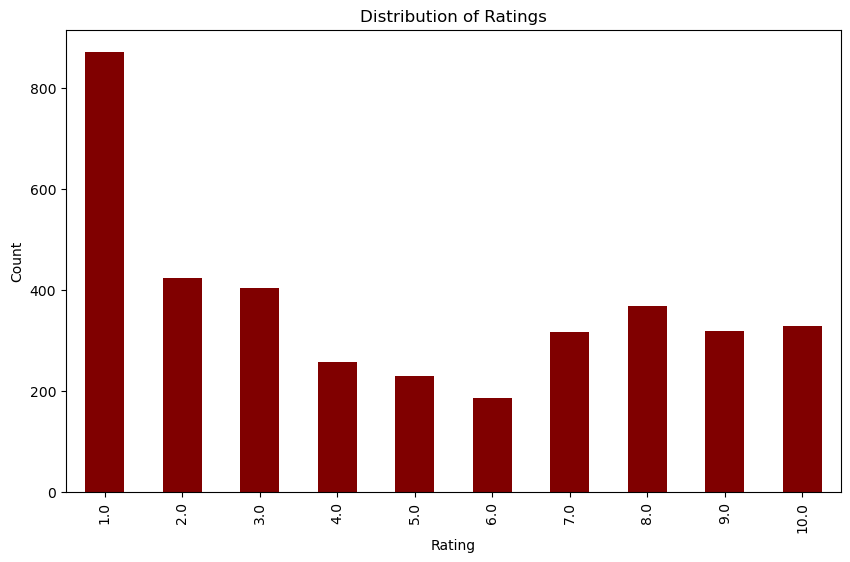

In [48]:
   # Distribution of Ratings



# The occurrences of each unique rating value

rating_counts = df['Ratings'].value_counts().sort_index()

# Display the count of each rating value

print("Rating Counts:")

print(rating_counts)

# Create a bar graph

plt.figure(figsize=(10, 6))

rating_counts.plot(kind='bar', color='maroon')

plt.title('Distribution of Ratings')

plt.xlabel('Rating')

plt.ylabel('Count')

plt.show()


## 2. Word frequency
identify the most frequently used words in the reviews to provide insights into the common themes and topics mentioned by customers.

Most common words:
[('wa', 13038), ('flight', 7897), ('ba', 4983), ('seat', 4527), ('service', 2975), ('time', 2442), ('food', 2378), ('london', 2234), ('crew', 2179), ('british', 2162), ('airway', 2155), ('good', 2073), ('cabin', 2052), ('class', 1913), ('hour', 1893), ('airline', 1775), ('one', 1682), ('staff', 1585), ('business', 1567), ('heathrow', 1542), ('would', 1511), ('economy', 1448), ('get', 1370), ('passenger', 1299), ('check', 1296), ('first', 1289), ('drink', 1195), ('u', 1161), ('plane', 1160), ('meal', 1137), ('return', 1122), ('lounge', 1117), ('club', 1109), ('back', 1081), ('lhr', 1038), ('boarding', 1008), ('even', 984), ('experience', 972), ('could', 969), ('customer', 957), ('bag', 929), ('new', 910), ('fly', 898), ('aircraft', 893), ('day', 855), ('ha', 825), ('minute', 809), ('told', 795), ('like', 766), ('long', 740), ('airport', 726), ('really', 718), ('well', 708), ('better', 701), ('way', 699), ('leg', 688), ('choice', 684), ('comfortable', 682), ('premium',

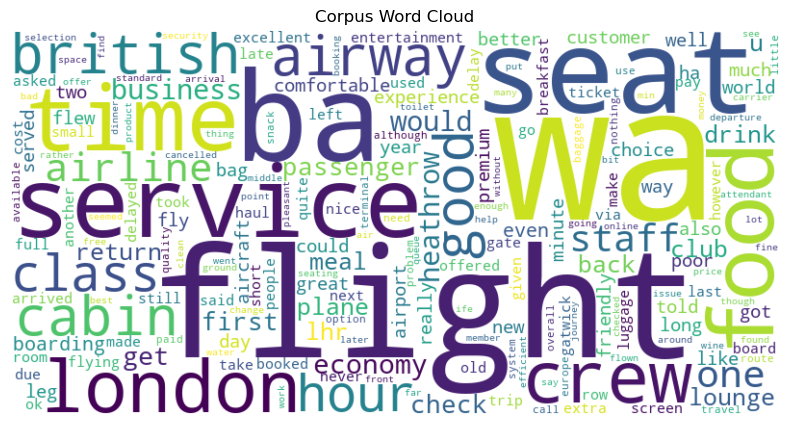

In [18]:
                      # word cloud  in the 'corpus' column.



# Difine'corpus' column that contains text data

corpus = df['corpus']

# Combining all reviews into a single string

all_text = ' '.join(corpus)

# Tokenize the text

tokens = word_tokenize(all_text.lower())   # Convert to lowercase for consistency

# Remove stopwords

stop_words = set(stopwords.words('english'))

filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]


# Count the frequency of each word

word_freq = Counter(filtered_tokens)

# Display the most common words

print("Most common words:")

print(word_freq.most_common(100))  # Change to the desired number of top words

# Visualize word cloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.title("Corpus Word Cloud")

plt.show()


Most common words:
[('.', 34359), ('the', 29816), ('to', 19767), ('and', 18300), (',', 14397), ('a', 13507), ('was', 13253), ('i', 11498), ('of', 8510), ('in', 8411), ('on', 7945), ('flight', 6630), ('for', 6305), ('with', 5893), ('it', 4850), ('ba', 4741), ('is', 4728), ('not', 4616), ('were', 4543), ('that', 4408), ('we', 4406), ('my', 4173), ('but', 3964), ('at', 3828), ('they', 3677), ('this', 3614), ('had', 3596), ('as', 3482), ('have', 3409), ('from', 3097), ('no', 2957), ('very', 2838), ('service', 2809), ('be', 2389), ('seat', 2380), ('food', 2357), ('you', 2282), ('-', 2207), ('london', 2188), ('so', 2173), ('british', 2161), ('airways', 2142), (')', 2132), ('are', 2129), ('crew', 2116), ('seats', 2113), ('(', 2104), ('good', 2069), ('an', 2068), ('time', 2046), ('cabin', 1974), ('me', 1951), ('which', 1916), ('class', 1861), ("n't", 1859), ('there', 1816), ('all', 1691), ('our', 1684), ('by', 1623), ('one', 1616), ('would', 1616), ('staff', 1582), ('when', 1568), ('or', 1560)

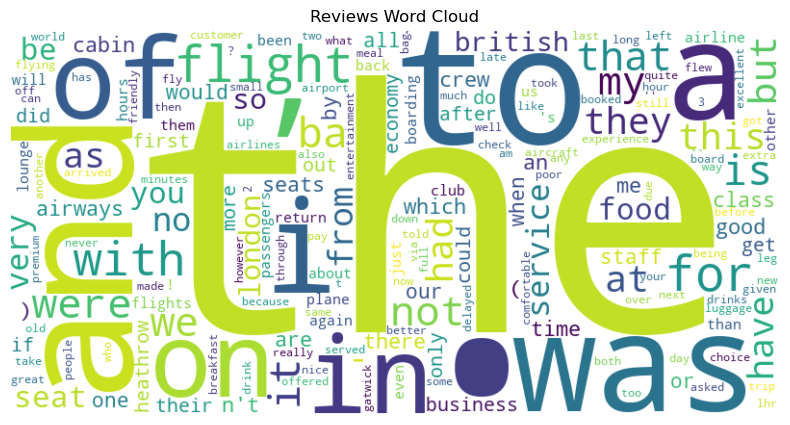

In [19]:
                     # word cloud  in the review column.


from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter

# Combine all reviews into a single string from the 'Reviews' column
all_text_reviews = ' '.join(df['Reviews'])

# Tokenize the raw text
tokens = word_tokenize(all_text_reviews.lower())  # Convert to lowercase for consistency

# Count the frequency of each word
word_freq = Counter(tokens)

# Display the most common words
print("Most common words:")
print(word_freq.most_common(100))  # Change to the desired number of top words

# Generate word cloud for the raw text in the 'Reviews' column
wordcloud_reviews = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display word cloud for the 'Reviews' column
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_reviews, interpolation='bilinear')
plt.axis('off')
plt.title("Reviews Word Cloud")
plt.show()


## Temporal Analysis:
Analyze the distribution of reviews over time to identify trends or patterns. Look for any spikes or dips in reviews that might correlate with specific events or changes.

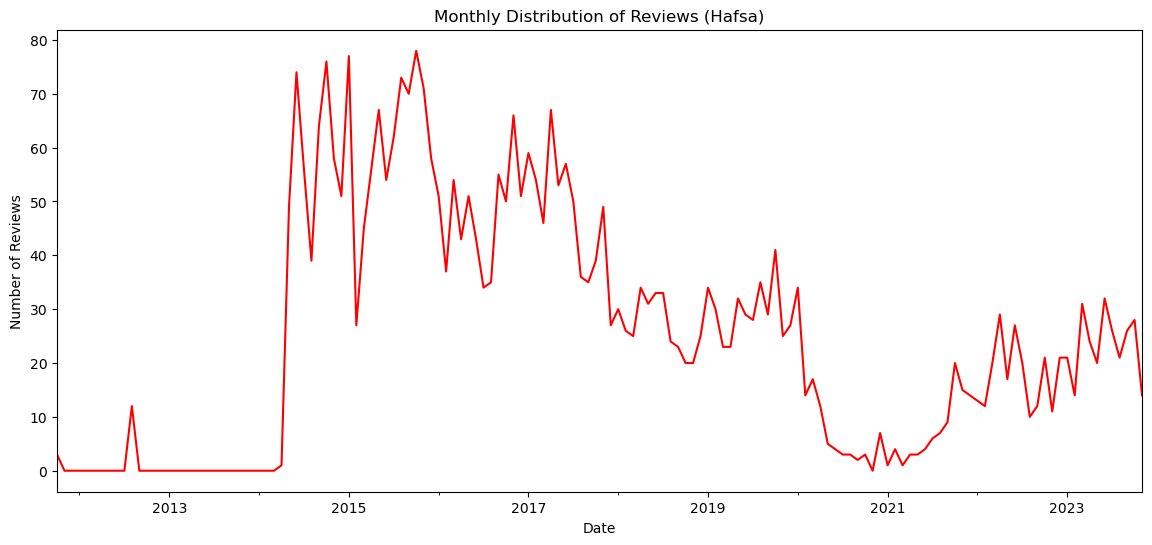

In [20]:


# Create a copy of the DataFrame
hafsa = df.copy()

# Assuming 'Dates' column is in datetime format
hafsa['Dates'] = pd.to_datetime(hafsa['Dates'])

# Setting 'Dates' column as the index for time-based analysis on the copy
hafsa.set_index('Dates', inplace=True)

# Plotting the distribution of reviews over time for the copy
plt.figure(figsize=(14, 6))
hafsa.resample('M').size().plot(legend=False, color='red')
plt.title('Monthly Distribution of Reviews (Hafsa)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()



Total Reviews per Year:
Dates
2011      3
2012     12
2013      0
2014    468
2015    738
2016    570
2017    572
2018    324
2019    356
2020    104
2021     87
2022    213
2023    257
dtype: int64


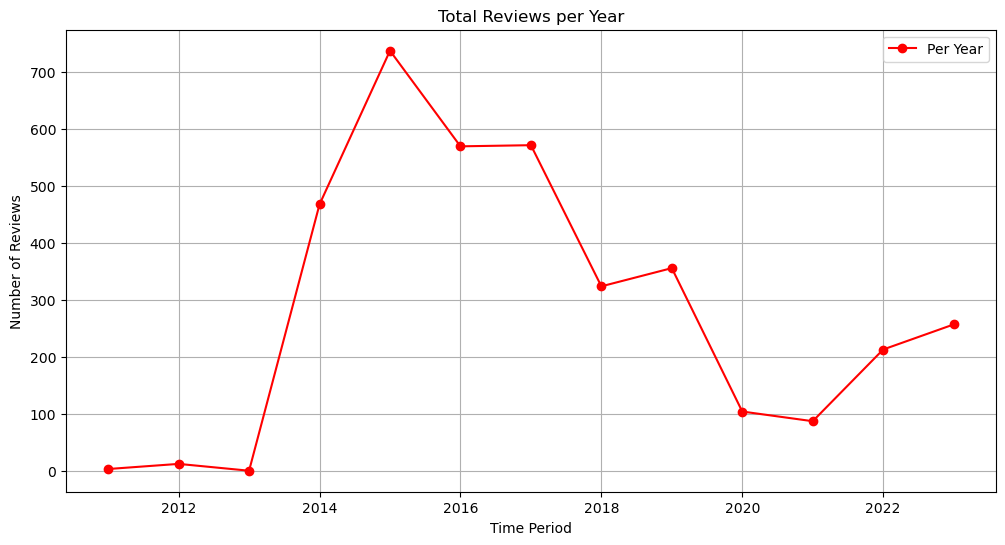

In [21]:


# Assuming 'Dates' column is in datetime format
df['Dates'] = pd.to_datetime(df['Dates'])

# Count the total reviews per year
reviews_per_year = df.resample('Y', on='Dates').size()

# Convert the index to the year
reviews_per_year.index = reviews_per_year.index.year


# Print the counts
print("\nTotal Reviews per Year:")
print(reviews_per_year)

# Plot a line chart of years against the number of reviews
plt.figure(figsize=(12, 6))
reviews_per_year.plot(kind='line', marker='o', color='red', label='Per Year')
plt.title('Total Reviews per Year')
plt.xlabel('Time Period')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()


In [22]:
# Display the columns of the DataFrame
print("Columns of the DataFrame:")
print(df.columns)


Columns of the DataFrame:
Index(['SN', 'Reviews', 'Dates', 'Titles', 'Countries', 'Ratings',
       'Trip Status', 'Trip Verification', 'corpus', 'sentiment',
       'sentiment_label', 'polarity', 'polarity_label', 'vader_mapped_label'],
      dtype='object')



## Rating Distribution:

Visualize the distribution of ratings to understand how customers generally rate their experiences. You can use histograms or box plots for this analysis.

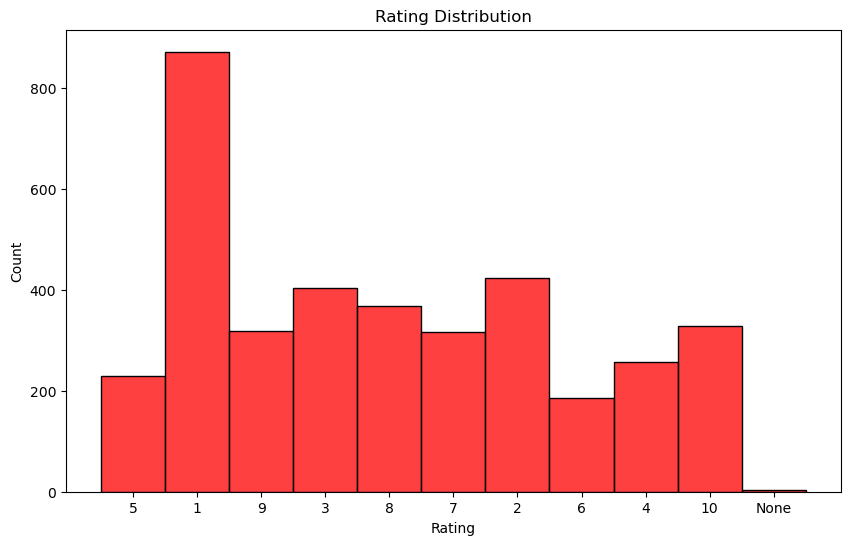

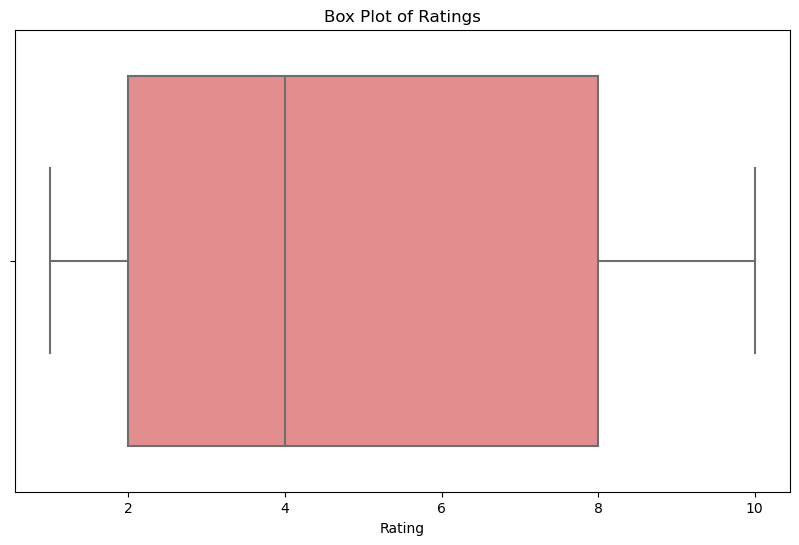

In [23]:

# Plotting a histogram

plt.figure(figsize=(10, 6))

sns.histplot(df['Ratings'], bins=5, kde=False, color='red', edgecolor='black')

plt.title('Rating Distribution')

plt.xlabel('Rating')

plt.ylabel('Count')

plt.show()


# Converting Ratings column to numeric since boxplot function expects a numeric variable for the x-axis

df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')  # 'coerce' will replace any non-numeric values with NaN


# Plotting a box plot

plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Ratings'], color='lightcoral')

plt.title('Box Plot of Ratings')

plt.xlabel('Rating')

plt.show()


## 6. Geographical Analysis:

conduct a geographical analysis to understand if there are regional variations in customer feedback.

identify regions with generally positive or negative feedback by creating Heatmap of Sentiment where the intensity of colors represents the sentiment of reviews in different regions.



In [24]:

# Counting the number of reviews for each country

country_counts = df['Countries'].value_counts()

print(country_counts)


United Kingdom           2322
United States             414
Australia                 161
Canada                    118
Germany                    64
Ireland                    41
Switzerland                40
South Africa               39
Netherlands                34
Spain                      31
Singapore                  27
France                     27
Belgium                    26
Thailand                   23
United Arab Emirates       23
Italy                      22
Sweden                     20
India                      18
China                      18
Hong Kong                  17
Greece                     15
Malaysia                   14
Portugal                   12
Austria                    11
New Zealand                11
Denmark                    10
Saudi Arabia                9
Mexico                      9
Poland                      8
Qatar                       7
Ghana                       7
Japan                       6
Argentina                   6
Romania   

In [31]:
                  # Getting latitude and longitude of countries 

from geopy.geocoders import Nominatim

# Create a geolocator object

geolocator = Nominatim(user_agent="your_app_name")

# to get coordinates for a country

def get_coordinates(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None

# Create a new DataFrame to store the coordinates

coordinates_df = pd.DataFrame(df['Countries'].unique(), columns=['Countries'])

# to get latitude and longitude  Apply the get_coordinates function

coordinates_df['Coordinates'] = coordinates_df['Countries'].apply(get_coordinates)

# Split Coordinates column into Latitude and Longitude

coordinates_df[['Latitude', 'Longitude']] = pd.DataFrame(coordinates_df['Coordinates'].tolist(), index=coordinates_df.index)

# Display the resulting DataFrame

print("Coordinates DataFrame:")

coordinates_df.head(70)

# Merge the coordinates back into the original DataFrame

df = pd.merge(df, coordinates_df, on='Countries', how='left')

df.head(70)




# Display the columns of the merged DataFrame

# print("Merged DataFrame Columns:")

# print(df.columns)




Coordinates DataFrame:


,SN,Reviews,Dates,Titles,Countries,Ratings,Trip Status,Trip Verification,corpus,sentiment,sentiment_label,polarity,polarity_label,vader_mapped_label,Coordinates,Latitude,Longitude
0,1,"Having not flown with BA for a few years, I ...",2023-11-30,"""I was pleasantly surprised""",United Kingdom,5.0,✅ Trip Verified,Yes,flown ba year read review preparation needle s...,-0.4770,negative,-0.065556,negative,negative,"(54.7023545, -3.2765753)",54.702354,-3.276575
1,2,Dear Community I feel compelled to share the ...,2023-11-26,"""Buckle up, folks; this one's a rollercoaster""",Switzerland,1.0,✅ Trip Verified,Yes,dear community feel compelled share utter frus...,-0.9552,negative,-0.005252,negative,negative,"(46.7985624, 8.2319736)",46.798562,8.231974
2,3,Quick bag drop at First Wing but too many pa...,2023-11-23,"""cabin crew excellent""",United Kingdom,9.0,✅ Trip Verified,Yes,quick bag drop first wing many passenger use f...,0.9806,positive,0.420000,positive,positive,"(54.7023545, -3.2765753)",54.702354,-3.276575
3,4,4 Hours before takeoff we received a Mail st...,2023-11-19,"""Service level far worse then Ryanair""",Germany,1.0,✅ Trip Verified,Yes,hour takeoff received mail stating cryptic mes...,-0.8704,negative,-0.048214,negative,negative,"(40.4203479, -79.1166983)",40.420348,-79.116698
4,5,I recently had a delay on British Airways fr...,2023-11-19,"""do not upgrade members based on status""",United States,3.0,✅ Trip Verified,Yes,recently delay british airway bru lhr wa due s...,-0.0972,negative,0.006944,positive,negative,"(39.7837304, -100.445882)",39.783730,-100.445882
5,6,"Boarded on time, but it took ages to get to ...",2023-11-16,"""Flight was smooth and quick""",Ireland,8.0,Not Verified,No,boarded time took age get runway due congestio...,0.4404,positive,0.140833,positive,positive,"(52.865196, -7.9794599)",52.865196,-7.979460
6,7,"5 days before the flight, we were advised by...",2023-11-16,"""Absolutely hopeless airline""",Australia,1.0,✅ Trip Verified,Yes,day flight advised ba cancelled asked u rebook...,-0.2247,negative,0.113889,positive,negative,"(-24.7761086, 134.755)",-24.776109,134.755000
7,8,\r\nWe traveled to Lisbon for our dream vaca...,2023-11-14,"""Customer Service is non existent""",United States,1.0,Not Verified,No,traveled lisbon dream vacation cruise portugal...,0.8074,positive,0.135417,positive,positive,"(39.7837304, -100.445882)",39.783730,-100.445882
8,9,Booked a flight from Bucharest to Manchester...,2023-11-12,"""I can’t imagine a worst airline""",Romania,1.0,✅ Trip Verified,Yes,booked flight bucharest manchester h layover h...,-0.9517,negative,-0.234896,negative,negative,"(45.9852129, 24.6859225)",45.985213,24.685923
9,10,Booked online months ago and the only hitch ...,2023-11-08,"""sufficient leg and arm room""",United Kingdom,8.0,✅ Trip Verified,Yes,booked online month ago hitch wa replacement a...,-0.2350,negative,0.100595,positive,negative,"(54.7023545, -3.2765753)",54.702354,-3.276575


In [32]:
                    ###  #Visualizing the countries ###



import folium
from folium import IFrame
import webbrowser
import pandas as pd
from geopy.geocoders import Nominatim

# Function to get coordinates for a country
def get_coordinates(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None

# Create a geolocator object
geolocator = Nominatim(user_agent="your_app_name")

# Create a new DataFrame to store the coordinates
coordinates_df = pd.DataFrame(df['Countries'].unique(), columns=['Countries'])

# Apply the get_coordinates function to get latitude and longitude
coordinates_df['Coordinates'] = coordinates_df['Countries'].apply(get_coordinates)

# Split Coordinates column into Latitude and Longitude
coordinates_df[['Latitude', 'Longitude']] = pd.DataFrame(coordinates_df['Coordinates'].tolist(), index=coordinates_df.index)

# Merge the coordinates back into the original DataFrame
df = pd.merge(df, coordinates_df, on='Countries', how='left', suffixes=('_orig', '_new'))

# Drop duplicate columns
df = df.drop(columns=['Latitude_orig', 'Longitude_orig', 'Coordinates_orig'])

# Filter out rows with NaN values in 'Latitude_new' and 'Longitude_new'
df = df.dropna(subset=['Latitude_new', 'Longitude_new'])

# Create a folium map centered around the first country with valid coordinates
map_center = [df['Latitude_new'].iloc[0], df['Longitude_new'].iloc[0]]
map_object = folium.Map(location=map_center, zoom_start=2)  # Adjust zoom level as needed

# Add markers for each country with valid coordinates
for index, row in df.iterrows():
    folium.Marker([row['Latitude_new'], row['Longitude_new']], popup=row['Countries']).add_to(map_object)

# Save the map as an HTML file
map_filename = "world_map.html"
map_object.save(map_filename)

# Display the map in the notebook
IFrame(map_filename, width=800, height=600)

# Open the map in a web browser
webbrowser.open(map_filename)


True

In [35]:
                               ### Map 2 ###


import pandas as pd
import folium
from IPython.display import IFrame
import webbrowser
from geopy.geocoders import Nominatim

# Function to get coordinates for a country
def get_coordinates(country):
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None

# Create a geolocator object
geolocator = Nominatim(user_agent="your_app_name")

# Create a new DataFrame to store the coordinates
coordinates_df = pd.DataFrame(df['Countries'].unique(), columns=['Countries'])

# Apply the get_coordinates function to get latitude and longitude
coordinates_df['Coordinates'] = coordinates_df['Countries'].apply(get_coordinates)

# Split Coordinates column into Latitude and Longitude
coordinates_df[['Latitude', 'Longitude']] = pd.DataFrame(coordinates_df['Coordinates'].tolist(), index=coordinates_df.index)

# Merge the coordinates back into the original DataFrame
df = pd.merge(df, coordinates_df, on='Countries', how='left')

# Check the actual column names in your DataFrame
print(df.columns)

# Using a folium map centered around the first country with valid coordinates
map_center = [df['Latitude'].iloc[0], df['Longitude'].iloc[0]]

map_object = folium.Map(location=map_center, zoom_start=2)  # Adjust zoom level as needed

# Create a set to keep track of countries already added
added_countries = set()

# Add markers for each country with valid coordinates
for index, row in df.iterrows():
    country_name = row['Countries']
    
    # Skip if the country has already been added
    if country_name in added_countries:
        continue
    
    # Add the country to the set
    added_countries.add(country_name)
    
    # Change the pointer color to red
    folium.Marker(
        [row['Latitude'], row['Longitude']],
        popup=country_name,
        icon=folium.Icon(color='red')
    ).add_to(map_object)

# Save the map as an HTML file
map_filename = "British_Airways_customers_reviews_world_map.html"
map_object.save(map_filename)

# Open the map in a web browser
webbrowser.open(map_filename)

# Display the map in the notebook
# IFrame(map_filename, width=800, height=600)


Index(['SN', 'Reviews', 'Dates', 'Titles', 'Countries', 'Ratings',
       'Trip Status', 'Trip Verification', 'corpus', 'sentiment',
       'sentiment_label', 'polarity', 'polarity_label', 'vader_mapped_label',
       'Coordinates_new', 'Latitude_new', 'Longitude_new', 'Coordinates',
       'Latitude', 'Longitude'],
      dtype='object')


True

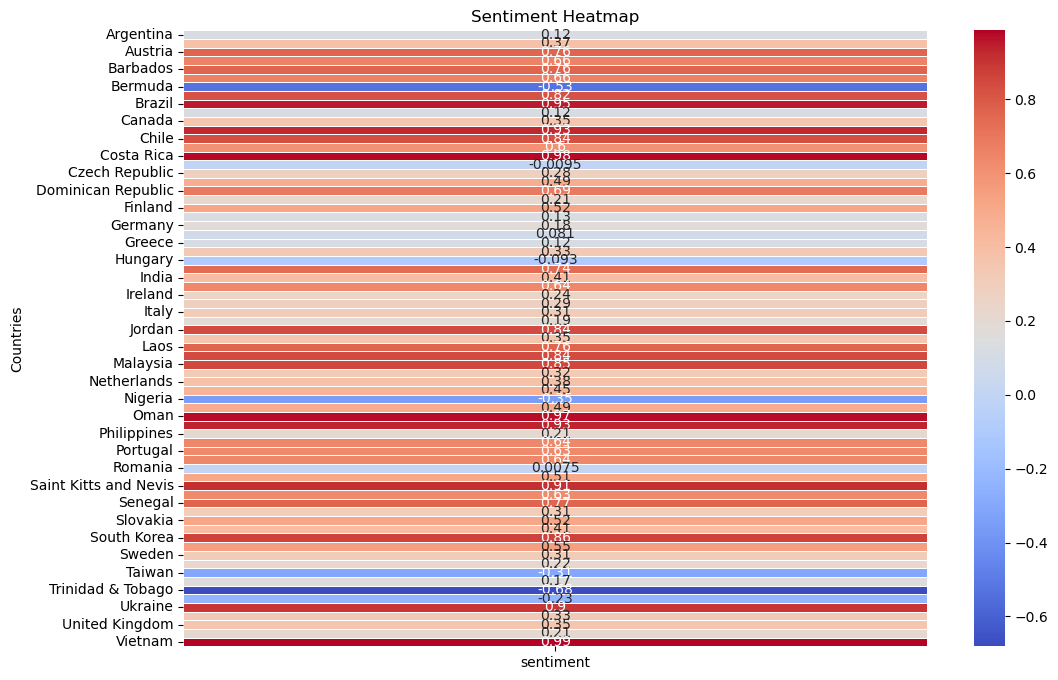

In [36]:
 #Generate a sentiment heatmap from customer reviews to pinpoint regions with predominantly positive or negative feedback.

# Create a geolocator object
geolocator = Nominatim(user_agent="your_app_name")

# Create a new DataFrame to store the coordinates
coordinates_df = pd.DataFrame(df['Countries'].unique(), columns=['Countries'])

# Merge the coordinates back into the original DataFrame
df = pd.merge(df, coordinates_df, on='Countries', how='left')

# Create a folium map centered around the first country with valid coordinates
map_center = [df['Latitude'].iloc[0], df['Longitude'].iloc[0]]
map_object = folium.Map(location=map_center, zoom_start=2)  # Adjust zoom level as needed

# Add markers for each country with valid coordinates
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Countries']).add_to(map_object)

# Save the map as an HTML file (optional)
map_filename = "world_map.html"
map_object.save(map_filename)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df.pivot_table(index='Countries', values='sentiment', aggfunc='mean'),
            cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Sentiment Heatmap')
plt.show()



Average Sentiment per Country:
                Countries  sentiment
70                Vietnam   0.986900
14             Costa Rica   0.978700
44                   Oman   0.969000
8                  Brazil   0.952250
45                 Panama   0.934900
11         Cayman Islands   0.930000
52  Saint Kitts and Nevis   0.909300
66                Ukraine   0.897900
58            South Korea   0.863700
38               Malaysia   0.850914
37             Luxembourg   0.840300
34                 Jordan   0.840200
12                  Chile   0.836000
7                Botswana   0.822000
54                Senegal   0.765000
4                Barbados   0.764500
2                 Austria   0.764200
36                   Laos   0.762400
27                Iceland   0.739820
18     Dominican Republic   0.690000
5                 Belgium   0.662250
3                 Bahrain   0.659700
47                 Poland   0.638437
49                  Qatar   0.637014
29              Indonesia   0.636900
48    

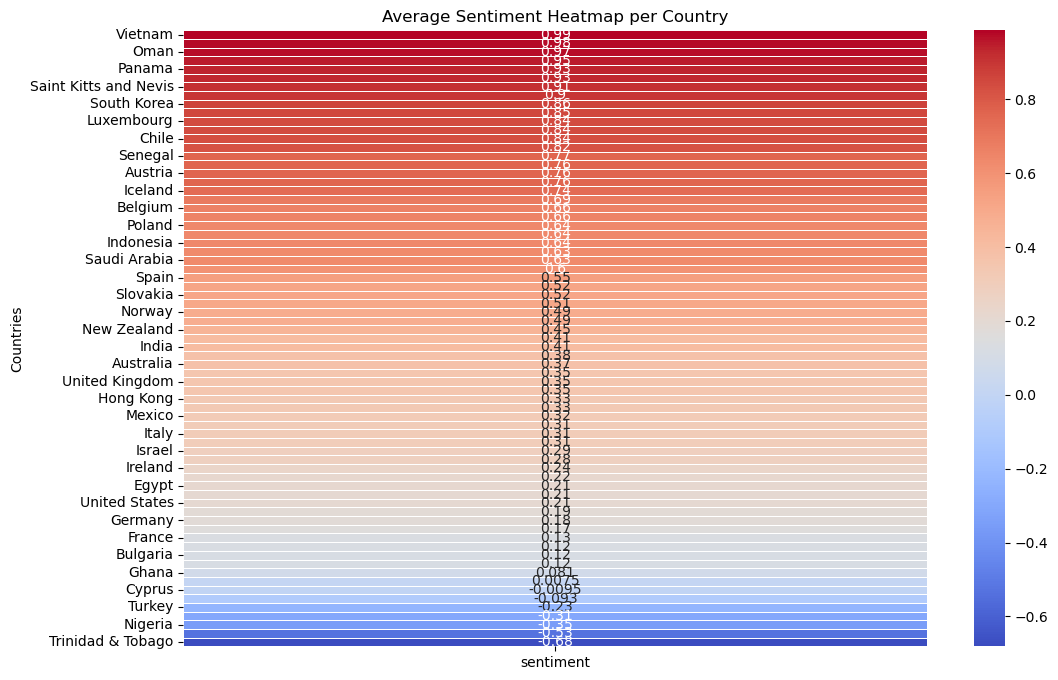

In [37]:
   ### Average sentiment heatmap of each contry to pinpoint regions with predominantly positive or negative feedback.
    


# Create a geolocator object
geolocator = Nominatim(user_agent="your_app_name")

# Create a new DataFrame to store the coordinates
coordinates_df = pd.DataFrame(df['Countries'].unique(), columns=['Countries'])

# Merge the coordinates back into the original DataFrame
df = pd.merge(df, coordinates_df, on='Countries', how='left')

# Print the DataFrame to see sentiment scores for each country
#print("DataFrame with Sentiment Scores:")
#print(df[['Countries', 'sentiment']])  # Displaying all the rows for illustration


# Create a folium map centered around the first country with valid coordinates
map_center = [df['Latitude'].iloc[0], df['Longitude'].iloc[0]]
map_object = folium.Map(location=map_center, zoom_start=2)  # Adjust zoom level as needed

# Add markers for each country with valid coordinates
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Countries']).add_to(map_object)

# Save the map as an HTML file (optional)
map_filename = "world_map.html"
map_object.save(map_filename)


# Calculate average sentiment per country
average_sentiments = df.groupby('Countries')['sentiment'].mean().reset_index()

# Assuming you have a DataFrame called df with sentiment scores and country information
heatmap_data = df.pivot_table(index='Countries', values='sentiment', aggfunc='mean')


# Sort the DataFrame by sentiment in descending order
average_sentiments = average_sentiments.sort_values(by='sentiment', ascending=False)


# Print the DataFrame with average sentiment per country
print("\nAverage Sentiment per Country:")
print(average_sentiments)



# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))

# Reorder rows of heatmap_data based on the sorted order of average_sentiments
heatmap_data = heatmap_data.reindex(average_sentiments['Countries'])

sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Average Sentiment Heatmap per Country')
plt.show()




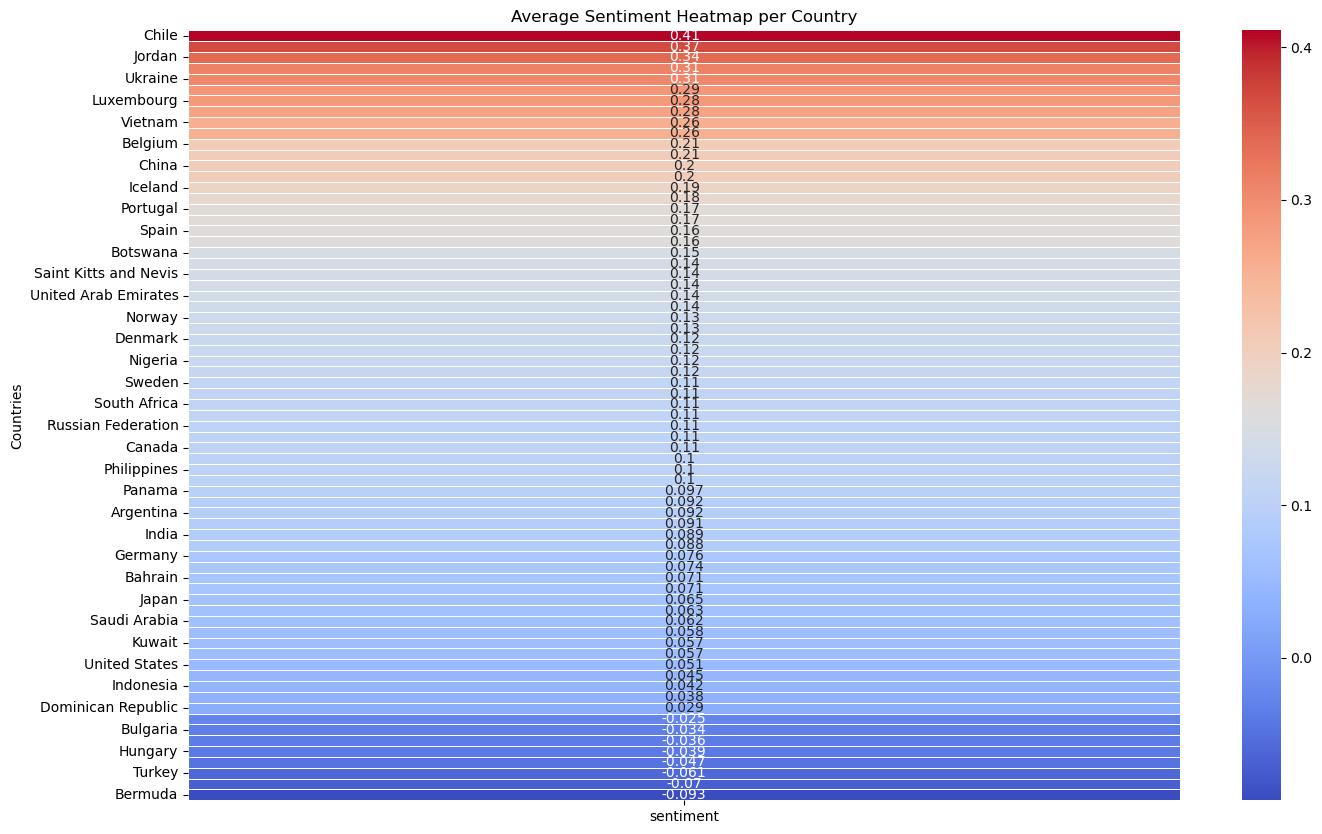

In [38]:
         #  geographical analysis to understand if there are regional variations in customer feedback.




import pandas as pd
import folium
from geopy.geocoders import Nominatim
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with 'Countries' and 'Reviews' columns
# You may need to install a sentiment analysis library like TextBlob for this step

# Sample sentiment analysis using TextBlob
from textblob import TextBlob
df['sentiment'] = df['Reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Create a geolocator object
geolocator = Nominatim(user_agent="your_app_name")

# Create a new DataFrame to store the coordinates
coordinates_df = pd.DataFrame(df['Countries'].unique(), columns=['Countries'])

# Merge the coordinates back into the original DataFrame
df = pd.merge(df, coordinates_df, on='Countries', how='left')

# Create a folium map centered around the first country with valid coordinates
map_center = [df['Latitude'].iloc[0], df['Longitude'].iloc[0]]
map_object = folium.Map(location=map_center, zoom_start=2)

# Add markers for each country with valid coordinates
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Countries']).add_to(map_object)

# Save the map as an HTML file (optional)
map_filename = "world_map.html"
map_object.save(map_filename)

# Calculate average sentiment per country
average_sentiments = df.groupby('Countries')['sentiment'].mean().reset_index()

# Sort the DataFrame by sentiment in descending order
average_sentiments = average_sentiments.sort_values(by='sentiment', ascending=False)

# Create a heatmap using seaborn
plt.figure(figsize=(16, 10))

# Assuming you have a DataFrame called heatmap_data based on your sentiment scores
heatmap_data = df.pivot_table(index='Countries', values='sentiment', aggfunc='mean')

# Reorder rows of heatmap_data based on the sorted order of average_sentiments
heatmap_data = heatmap_data.reindex(average_sentiments['Countries'])

sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Average Sentiment Heatmap per Country')
plt.show()







In [27]:
                      ## Cleaning Dates
 
     
    
# Creating a copy of the data

cleaned_data = df.copy()

# Cleaning Dates column to datetime format

df['Dates'] = pd.to_datetime(cleaned_data['Dates'])

# Display the updated DataFrame information

print("Cleaned Data Information:")

print(df.dtypes)

# Display the first 20 rows of the updated DataFrame

print("Cleaned British Airways Customer Reviews Datasets:")

df.head(5)



Cleaned Data Information:
SN                             int64
Reviews                       object
Dates                 datetime64[ns]
Titles                        object
Countries                     object
Ratings                      float64
Trip Status                   object
Trip Verification             object
corpus                        object
sentiment                    float64
sentiment_label               object
polarity                     float64
polarity_label                object
vader_mapped_label            object
dtype: object
Cleaned British Airways Customer Reviews Datasets:


,SN,Reviews,Dates,Titles,Countries,Ratings,Trip Status,Trip Verification,corpus,sentiment,sentiment_label,polarity,polarity_label,vader_mapped_label
0,1,"Having not flown with BA for a few years, I ...",2023-11-30,"""I was pleasantly surprised""",United Kingdom,5.0,✅ Trip Verified,Yes,flown ba year read review preparation needle s...,-0.4770,negative,-0.065556,negative,negative
1,2,Dear Community I feel compelled to share the ...,2023-11-26,"""Buckle up, folks; this one's a rollercoaster""",Switzerland,1.0,✅ Trip Verified,Yes,dear community feel compelled share utter frus...,-0.9552,negative,-0.005252,negative,negative
2,3,Quick bag drop at First Wing but too many pa...,2023-11-23,"""cabin crew excellent""",United Kingdom,9.0,✅ Trip Verified,Yes,quick bag drop first wing many passenger use f...,0.9806,positive,0.420000,positive,positive
3,4,4 Hours before takeoff we received a Mail st...,2023-11-19,"""Service level far worse then Ryanair""",Germany,1.0,✅ Trip Verified,Yes,hour takeoff received mail stating cryptic mes...,-0.8704,negative,-0.048214,negative,negative
4,5,I recently had a delay on British Airways fr...,2023-11-19,"""do not upgrade members based on status""",United States,3.0,✅ Trip Verified,Yes,recently delay british airway bru lhr wa due s...,-0.0972,negative,0.006944,positive,negative


In [58]:
               ### Saving the extracted Customer reviews as a excel File

file_path = r"C:\Users\Hafsa\Downloads\British Airways customer reviews.xlsx"

# Save the DataFrame to the specified Excel file

df.to_excel(file_path, index=False)

# Print a message indicating the file has been saved

print(f"\nCleaned data saved to : {file_path}")


Cleaned data saved to : C:\Users\Hafsa\Downloads\British Airways customer reviews.xlsx


In [40]:
!pip install dash
!pip install dash dash-core-components dash-html-components

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import webbrowser
import folium
from folium import IFrame
import pandas as pd

# Assuming you have a DataFrame named 'df' with the necessary data



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [41]:
import base64
from io import BytesIO

# ... (your previous code)

# Visualize word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Convert wordcloud to a BytesIO object
wordcloud_image = BytesIO()
wordcloud.to_image().save(wordcloud_image, format='PNG')
wordcloud_base64 = base64.b64encode(wordcloud_image.getvalue()).decode('utf-8')

# ... (your remaining code)


# In your dashboard layout
html.Img(src=f'data:image/png;base64,{wordcloud_base64}')






# Plotting the distribution of reviews over time
time_distribution_plot = plt.figure(figsize=(14, 6))
df.resample('M').size().plot(legend=False)
plt.title('Monthly Distribution of Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')













# Plotting a histogram
histogram_plot = plt.figure(figsize=(10, 6))
sns.histplot(df['Ratings'], bins=5, kde=False, color='red', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Plotting a box plot
box_plot = plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Ratings'], color='lightcoral')
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')

# Create a folium map
folium_map = folium.Map(location=[df['Latitude_new'].iloc[0], df['Longitude_new'].iloc[0]], zoom_start=2)
# Add markers for each country with valid coordinates
for index, row in df.iterrows():
    folium.Marker([row['Latitude_new'], row['Longitude_new']], popup=row['Countries']).add_to(folium_map)

# Save the folium map to an HTML file
folium_filename = "world_map.html"
folium_map.save(folium_filename)

# Create a heatmap using seaborn
average_sentiments = df.groupby('Countries')['sentiment'].mean().reset_index()
heatmap_data = df.pivot_table(index='Countries', values='sentiment', aggfunc='mean')
heatmap_data = heatmap_data.reindex(average_sentiments['Countries'])
heatmap_plot = plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Average Sentiment Heatmap per Country')

# Initialize Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Customer Reviews Dashboard"),
    
    # Word Cloud
    html.Div([
        html.H2("Word Cloud"),
        html.Img(src=f'data:image/png;base64,{wordcloud_base64}')
    ]),
    
    # Distribution of reviews over time
    html.Div([
        html.H2("Monthly Distribution of Reviews"),
        dcc.Graph(figure=px.imshow(time_distribution_plot)),
    ]),

    # Rating Distribution Histogram
    html.Div([
        html.H2("Rating Distribution"),
        dcc.Graph(figure=px.imshow(histogram_plot)),
    ]),

    # Box Plot of Ratings
    html.Div([
        html.H2("Box Plot of Ratings"),
        dcc.Graph(figure=px.imshow(box_plot)),
    ]),

    # Folium Map
    html.Div([
        html.H2("Folium Map"),
        html.Iframe(srcDoc=open(folium_filename, 'r').read(), width='100%', height='600'),
    ]),

    # Average Sentiment Heatmap
    html.Div([
        html.H2("Average Sentiment Heatmap per Country"),
        dcc.Graph(figure=px.imshow(heatmap_plot)),
    ]),
])

# Run the app
if __name__ == '__main__':
    webbrowser.open("http://127.0.0.1:8050/")  # Open in browser automatically
    app.run_server(debug=True)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

<Figure size 1400x600 with 0 Axes>